In [1]:
#------------PROJECT ON TEMPERATURE PREDICTION---------------------------------
#BY  ABHISHEK BHATTACHARYYA AND VENKATESH DURVASULA 

In [2]:
# --------------------Importing the libraries------------------

import pandas as pd #To work with dataframes
import seaborn as sns# To visualize data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix # Importing performance metrics - accuracy score & confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#-----------Setting dimensions for plot----------------- 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# ----------------------Importing the dataset--------------------
weatherdataset = pd.read_csv('Indian Summers - Over the years.csv')

#getting to know the data
weather = weatherdataset.copy()
#making deep copy

#To check the variable datatype
print(weather.info())
#to check the variable present in data type

#To Sumarize the data
print(weather.describe())

#restricting to 3 decimal points and to get rid of scientific values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(weather.describe())

# To display maximum set of columns
pd.set_option('display.max_columns',500)
print(weather.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              13650 non-null  object 
 1   Date              13650 non-null  object 
 2   tempmax           13615 non-null  float64
 3   tempmin           13615 non-null  float64
 4   temp              13605 non-null  float64
 5   feelslikemax      13614 non-null  float64
 6   feelslikemin      13614 non-null  float64
 7   feelslike         13604 non-null  float64
 8   dew               13605 non-null  float64
 9   humidity          13605 non-null  float64
 10  windspeed         13605 non-null  float64
 11  winddir           13600 non-null  float64
 12  sealevelpressure  10631 non-null  float64
 13  cloudcover        13605 non-null  float64
 14  visibility        13605 non-null  float64
 15  sunrise           13650 non-null  object 
 16  sunset            13650 non-null  object

In [3]:
#--------------------------------Dropping the columns that are not required-----------------------------------------
col=['City','Date','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','winddir','sunrise','sunset','moonphase','conditions','description']
weather = weather.drop(columns=col,axis=1)

#-----------------------------------Removing duplicate records------------------------------------
weather.drop_duplicates(keep='first',inplace=True)



THE DATA COLUMNS WITH NULL VALUES ARE : 
 temp                   1
dew                    1
humidity               1
windspeed              1
sealevelpressure    2975
cloudcover             1
visibility             1
dtype: int64


<AxesSubplot:ylabel='temp'>

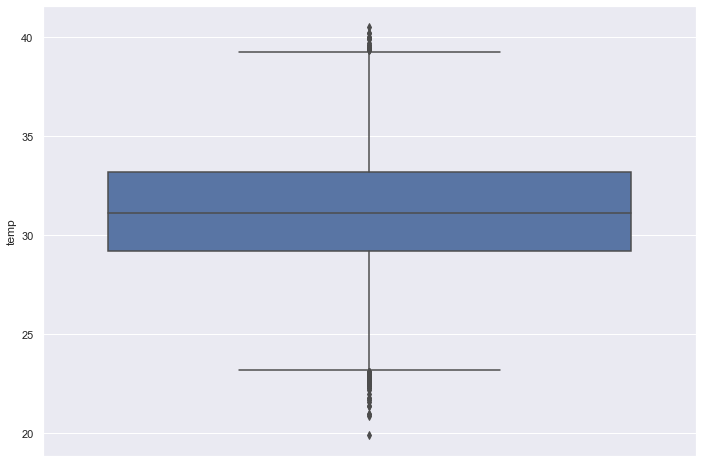

In [4]:
#------------------------DATA CLEANING--------------------

#To check for null/missing values
print("\nTHE DATA COLUMNS WITH NULL VALUES ARE : \n",weather.isnull().sum())
sns.boxplot(y=weather['temp'])

In [5]:
print("\n\nTHE VALUES OF TEMP TO BE DISCARDED : ")
print("\n",sum(weather['temp']<25))
print("\n",sum(weather['temp']>38))
#working in the range 25 to 38



THE VALUES OF TEMP TO BE DISCARDED : 

 351

 147


<AxesSubplot:ylabel='dew'>

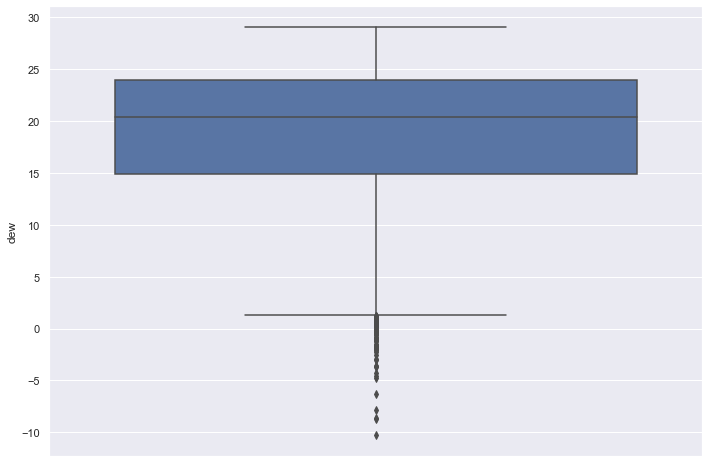

In [6]:
sns.boxplot(y=weather['dew'])

In [7]:
print("\n\nTHE VALUES OF DEW TO BE DISCARDED : ")
print("\n",sum(weather['dew']<4))
print("\n",sum(weather['dew']>28))
#working in the range 4 to 28



THE VALUES OF DEW TO BE DISCARDED : 

 175

 22


<AxesSubplot:ylabel='humidity'>

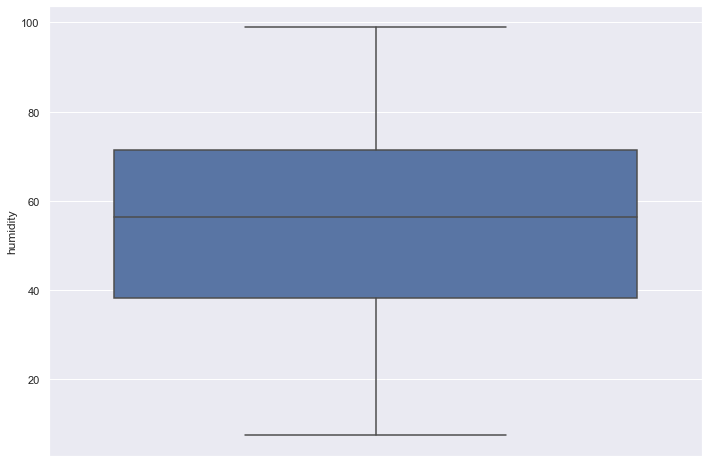

In [8]:
sns.boxplot(y=weather['humidity'])

In [9]:
print("\n\nTHE VALUES OF HUMIDITY TO BE DISCARDED : ")
print("\n",sum(weather['humidity']>90))
print("\n",sum(weather['humidity']<17))
#working in the range 17 to 90



THE VALUES OF HUMIDITY TO BE DISCARDED : 

 182

 153


<AxesSubplot:ylabel='windspeed'>

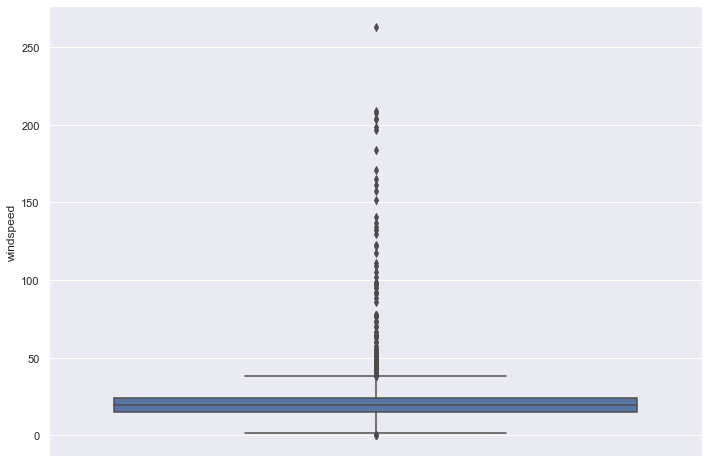

In [10]:
sns.boxplot(y=weather['windspeed'])

In [11]:
print("\n\nTHE VALUES OF WINDSPEED TO BE DISCARDED : ")
print("\n",sum(weather['windspeed']>37))
print("\n",sum(weather['windspeed']<5))
#working in the range 5 to 37



THE VALUES OF WINDSPEED TO BE DISCARDED : 

 341

 51


<AxesSubplot:ylabel='sealevelpressure'>

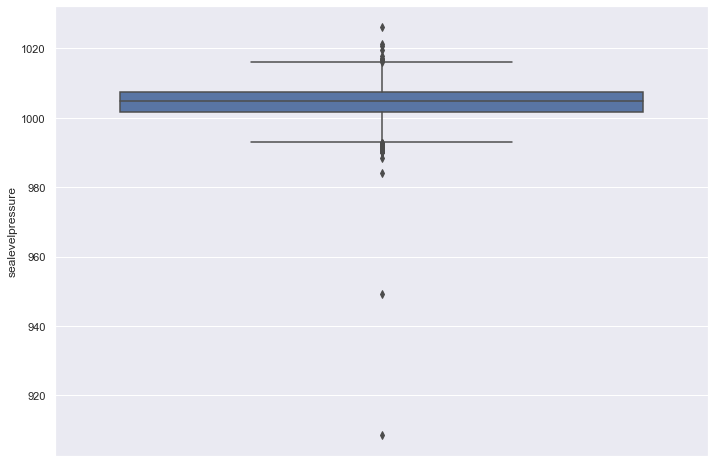

In [12]:
sns.boxplot(y=weather['sealevelpressure'])

In [13]:
print("\n\nTHE VALUES OF SEALEVEL TO BE DISCARDED : ")
print("\n",sum(weather['sealevelpressure']>1011))
print("\n",sum(weather['sealevelpressure']<996))
#working in the range 996 to 1011



THE VALUES OF SEALEVEL TO BE DISCARDED : 

 304

 280


<AxesSubplot:ylabel='cloudcover'>

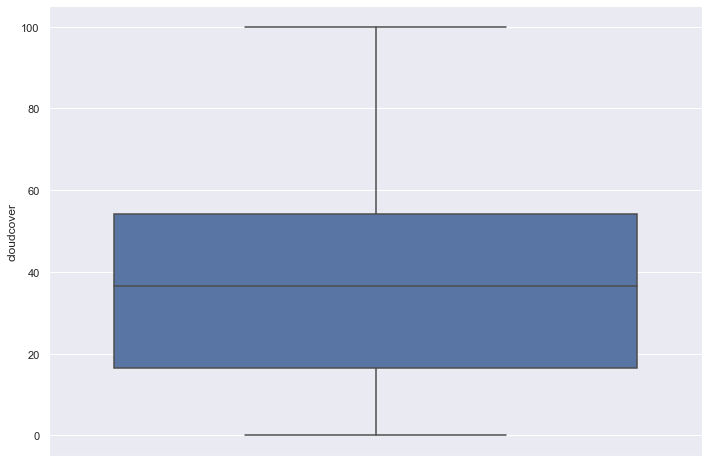

In [14]:
sns.boxplot(y=weather['cloudcover'])

In [15]:
print("\n\nTHE VALUES OF CLOUDCOVER TO BE DISCARDED : ")
print("\n",sum(weather['cloudcover']>95))
print("\n",sum(weather['cloudcover']<0))
#working in the range 0 to 95



THE VALUES OF CLOUDCOVER TO BE DISCARDED : 

 100

 0


<AxesSubplot:ylabel='visibility'>

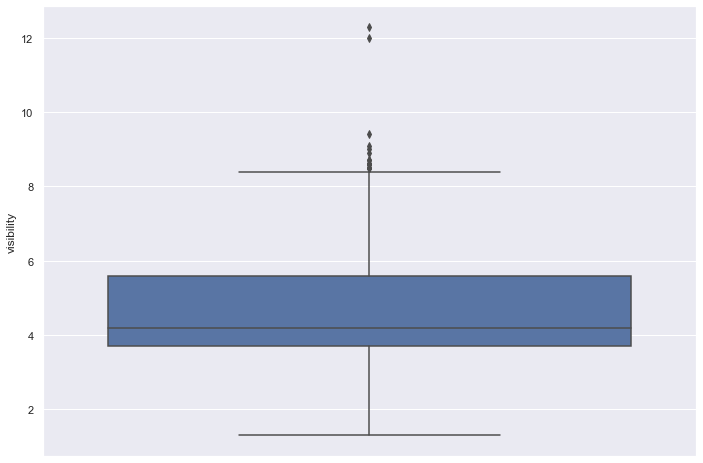

In [16]:
sns.boxplot(y=weather['visibility'])

In [17]:
print("\n\nTHE VALUES OF VISIBILITY TO BE DISCARDED : ")
print("\n\n",sum(weather['visibility']>7.3))
print("\n\n",sum(weather['visibility']<2))
#working in the range 2 to 7.3



THE VALUES OF VISIBILITY TO BE DISCARDED : 


 545


 17


In [18]:
#--------WORKING ON THE RANGE OF DATAS-----------------
weather_new = weather[
        (weather.temp>=25)
      & (weather.temp<=38) 
      & (weather.dew>=4) 
      & (weather.dew<=28)
      & (weather.humidity>=17) 
      & (weather.humidity<=90)
      & (weather.windspeed>=5) 
      & (weather.windspeed<=37)
      & (weather.sealevelpressure>=996) 
      & (weather.sealevelpressure<=1011)
      & (weather.cloudcover>=0) 
      & (weather.cloudcover<=95)
      & (weather.visibility>=2) 
      & (weather.visibility<=7.3)]
#here we have minimized the dataset 

#checking for null values again
print("\nTHE DATA COLUMNS WITH NULL VALUES ARE : \n",weather_new.isnull().sum())
#SO HERE WE HAVE NO NULL VALUES after minimizing the range

#so we are again viewing the data to check all are float values or not
print("\n\n",weather_new.info())

#WE ARE DESCRIBING the dataset
print("\n\n",weather_new.describe())
#SO WE SEE THE DATASET IS MUCH LESS SKEWED 


THE DATA COLUMNS WITH NULL VALUES ARE : 
 temp                0
dew                 0
humidity            0
windspeed           0
sealevelpressure    0
cloudcover          0
visibility          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9034 entries, 1 to 13558
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              9034 non-null   float64
 1   dew               9034 non-null   float64
 2   humidity          9034 non-null   float64
 3   windspeed         9034 non-null   float64
 4   sealevelpressure  9034 non-null   float64
 5   cloudcover        9034 non-null   float64
 6   visibility        9034 non-null   float64
dtypes: float64(7)
memory usage: 564.6 KB


 None


           temp      dew  humidity  windspeed  sealevelpressure  cloudcover  \
count 9034.000 9034.000  9034.000   9034.000          9034.000    9034.000   
mean    31.403   19.228    54.155     18.865       

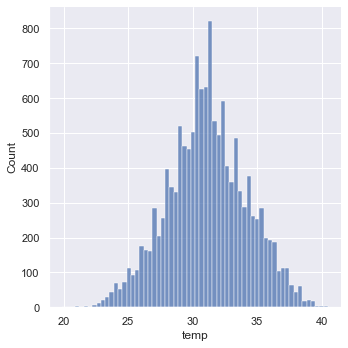

In [19]:
#-------------------------------COMPARING GRAPHS FOR OLDER VS NEWER DATASET----------------------------------


#--------FOR TEMP VARIABLE---------- 

#OLDER DATASET
sns.displot(weather['temp'])

<AxesSubplot:ylabel='temp'>

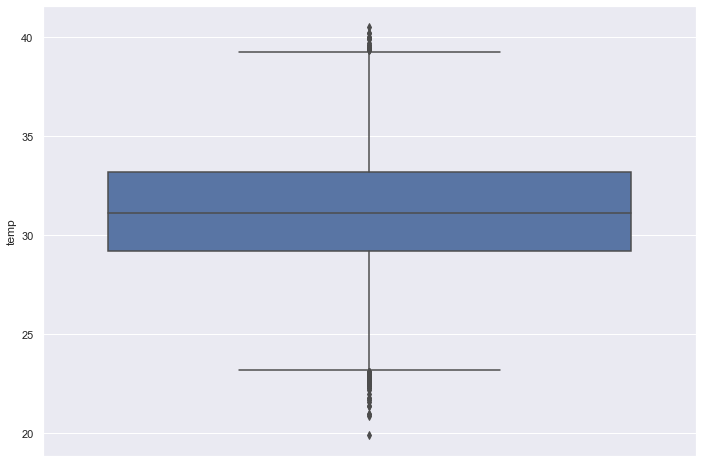

In [20]:
sns.boxplot(y=weather['temp'])

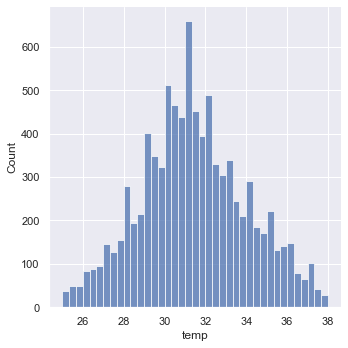

In [21]:
#NEWER DATASET
sns.displot(weather_new['temp'])

<AxesSubplot:ylabel='temp'>

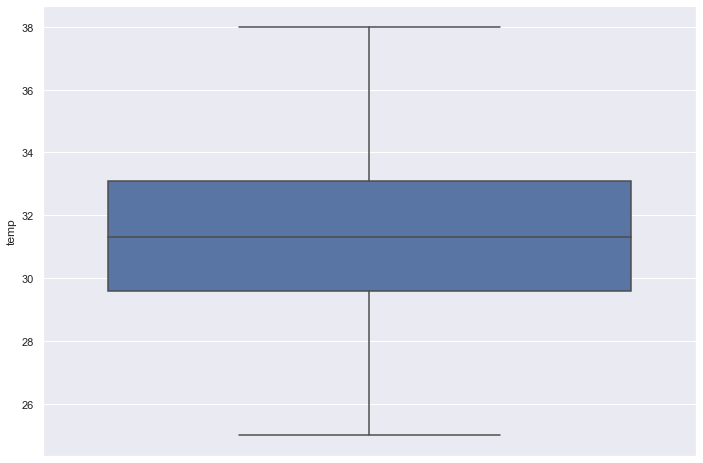

In [22]:
sns.boxplot(y=weather_new['temp'])

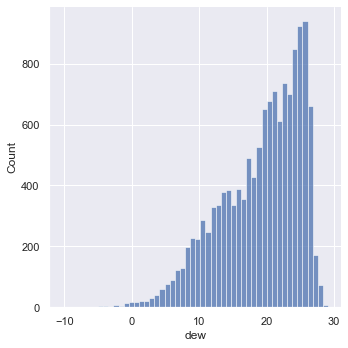

In [23]:
#-----------------FOR DEW VARIABLE--------------- 

#OLDER DATASET
sns.displot(weather['dew'])

<AxesSubplot:ylabel='dew'>

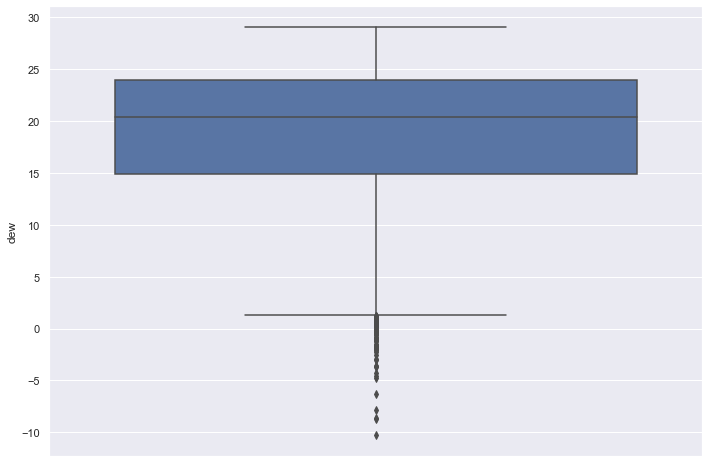

In [24]:
sns.boxplot(y=weather['dew'])

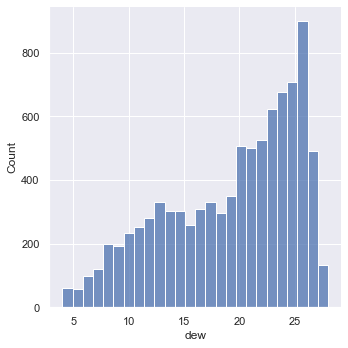

In [25]:
#NEWER DATASET
sns.displot(weather_new['dew'])

<AxesSubplot:ylabel='dew'>

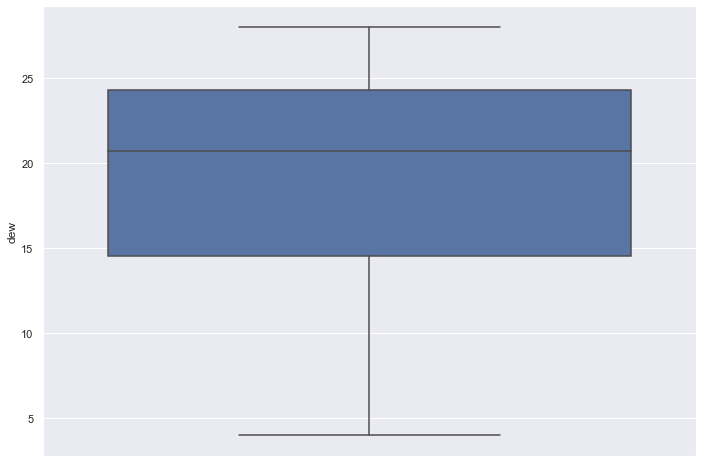

In [26]:
sns.boxplot(y=weather_new['dew'])

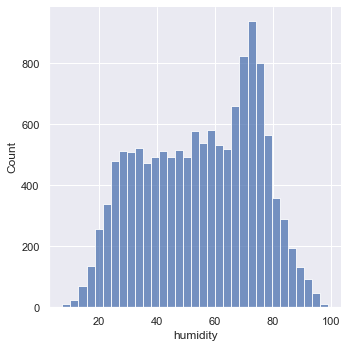

In [27]:
#--------------------FOR HUMIDITY VARIABLE-------------------

#OLDER DATASET
sns.displot(weather['humidity'])

<AxesSubplot:ylabel='humidity'>

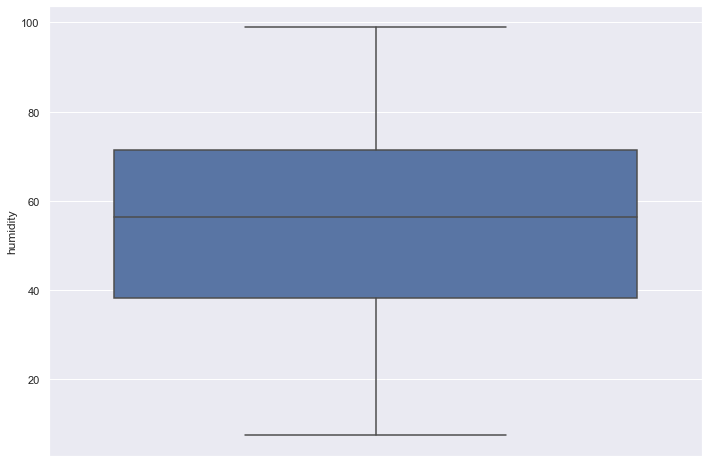

In [28]:
sns.boxplot(y=weather['humidity'])

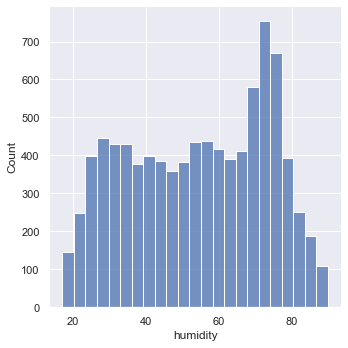

In [29]:
#NEWER DATASET
sns.displot(weather_new['humidity'])

<AxesSubplot:ylabel='humidity'>

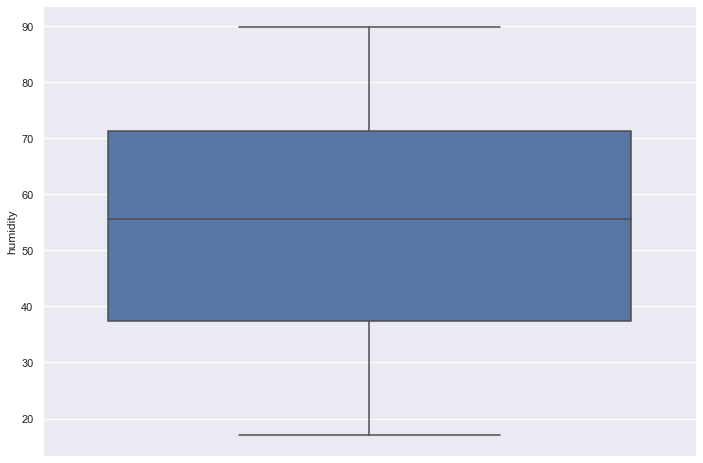

In [30]:
sns.boxplot(y=weather_new['humidity'])

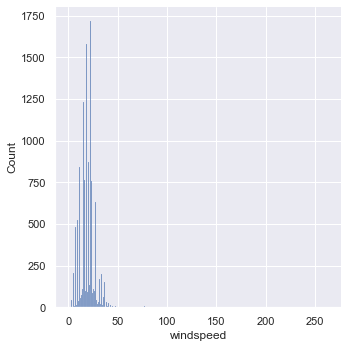

In [31]:
#---------------FOR WINDSPEED VARIABLE-------------

#OLDER DATASET
sns.displot(weather['windspeed'])

<AxesSubplot:ylabel='windspeed'>

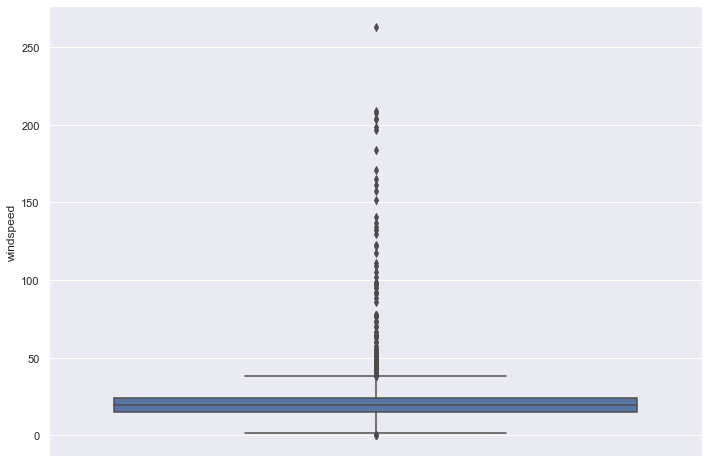

In [32]:
sns.boxplot(y=weather['windspeed'])

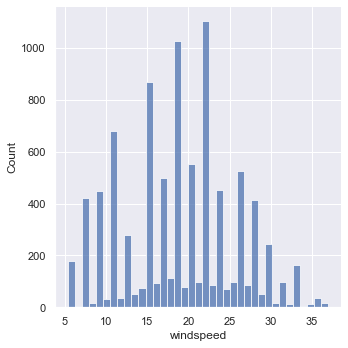

In [33]:
#NEWER DATASET
sns.displot(weather_new['windspeed'])

<AxesSubplot:ylabel='windspeed'>

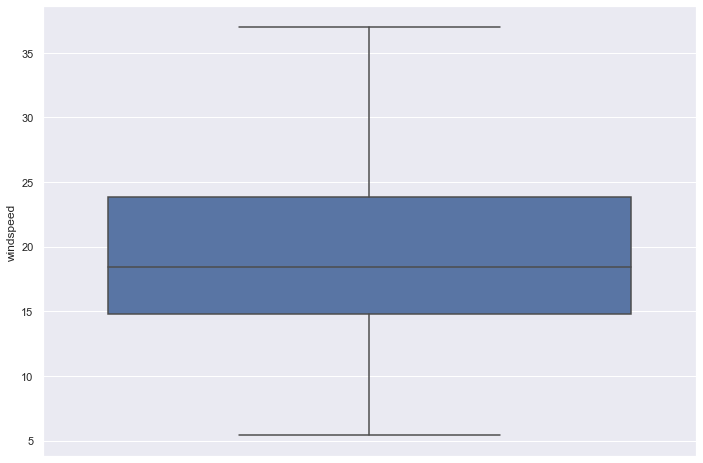

In [34]:
sns.boxplot(y=weather_new['windspeed'])

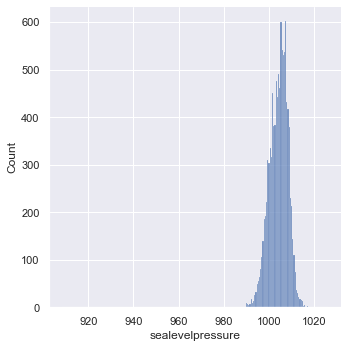

In [35]:
#------------------------FOR SEA LEVEL PRESSURE---------------------

#OLDER DATASET
sns.displot(weather['sealevelpressure'])

<AxesSubplot:ylabel='sealevelpressure'>

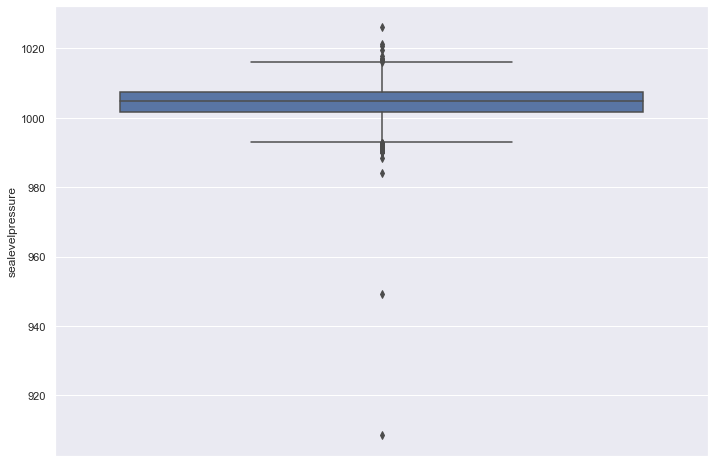

In [36]:
sns.boxplot(y=weather['sealevelpressure'])

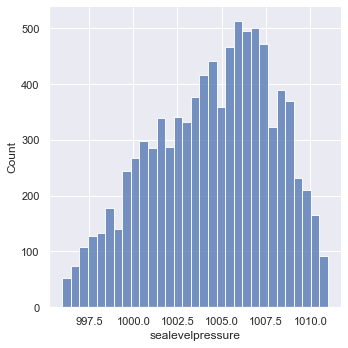

In [37]:
#NEWER DATASET
sns.displot(weather_new['sealevelpressure'])

<AxesSubplot:ylabel='sealevelpressure'>

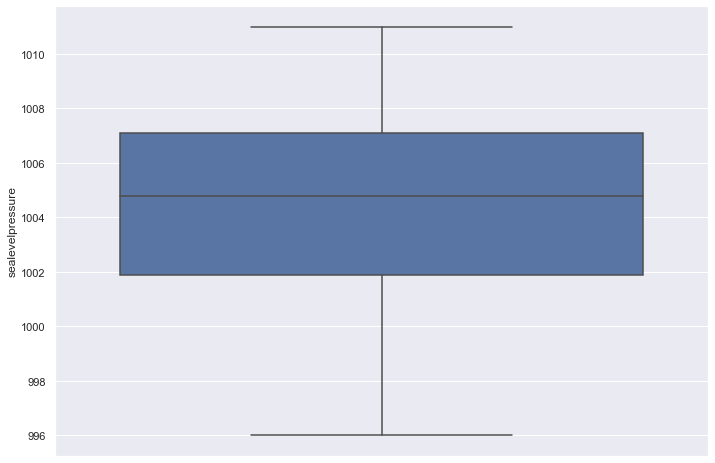

In [38]:
sns.boxplot(y=weather_new['sealevelpressure'])

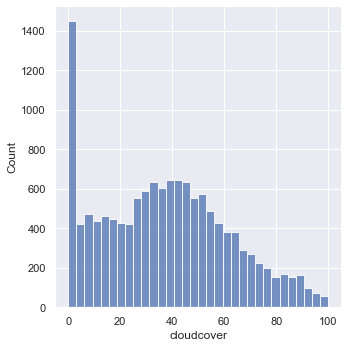

In [39]:
#------------------------FOR CLOUDCOVER------------------

#OLDER DATASET
sns.displot(weather['cloudcover'])

<AxesSubplot:ylabel='cloudcover'>

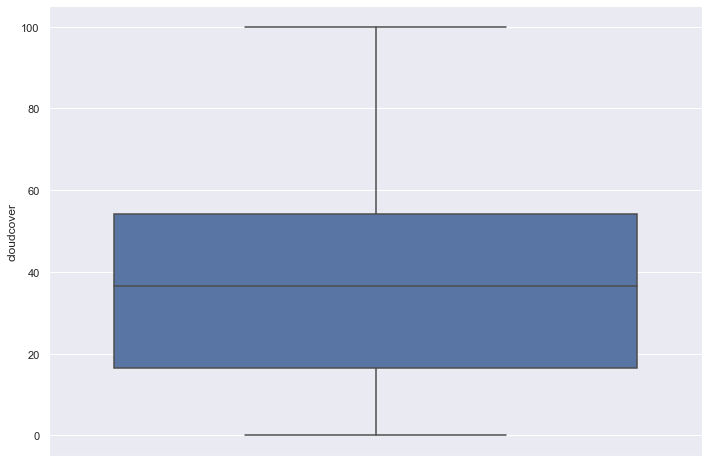

In [40]:
sns.boxplot(y=weather['cloudcover'])

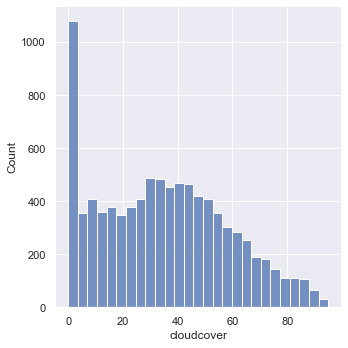

In [41]:
#NEWER DATASET
sns.displot(weather_new['cloudcover'])

<AxesSubplot:ylabel='cloudcover'>

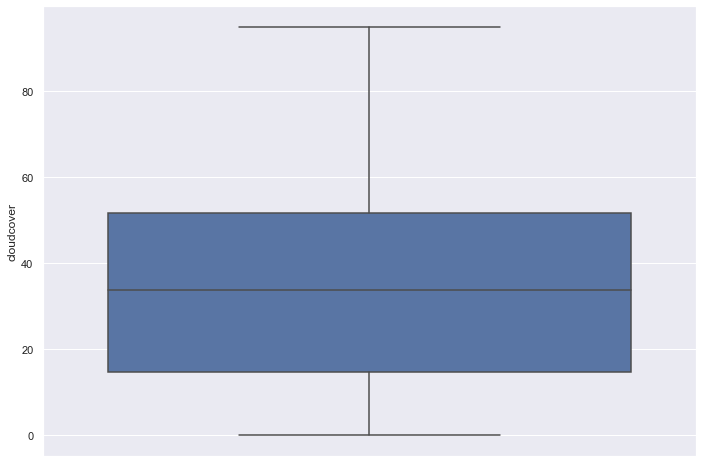

In [42]:
sns.boxplot(y=weather_new['cloudcover'])

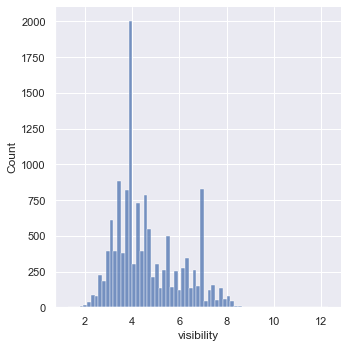

In [43]:
#--------------------------FOR VISIBILITY-------------------

#OLDER DATASET
sns.displot(weather['visibility'])

<AxesSubplot:ylabel='visibility'>

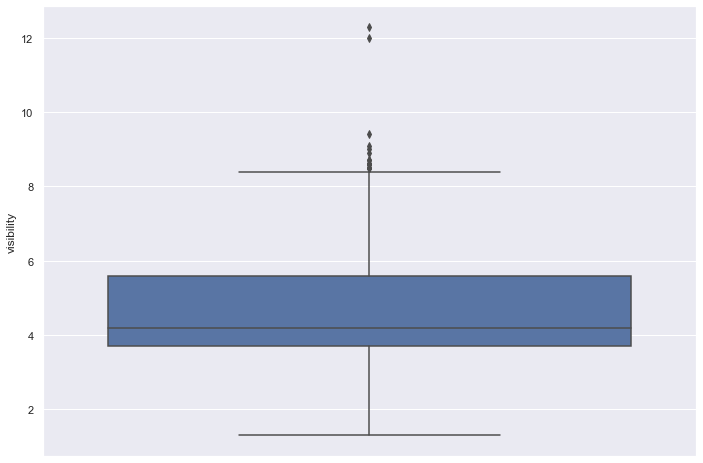

In [44]:
sns.boxplot(y=weather['visibility'])

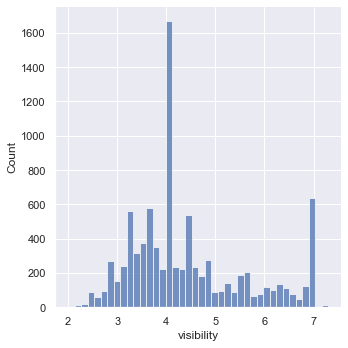

In [45]:
#NEWER DATASET
sns.displot(weather_new['visibility'])

<AxesSubplot:ylabel='visibility'>

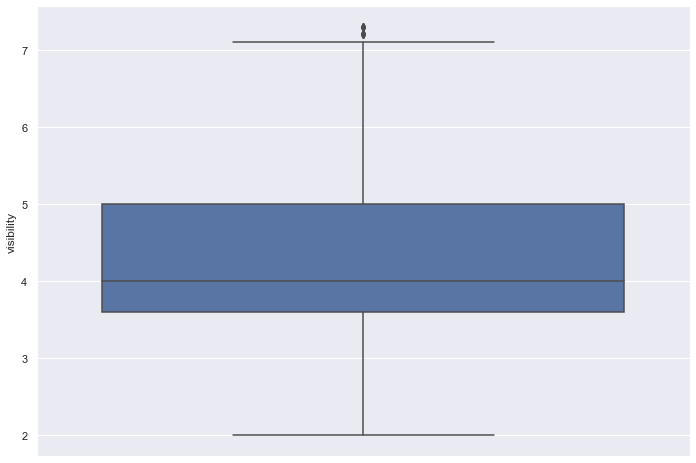

In [46]:
sns.boxplot(y=weather_new['visibility'])

#SO WE SAW THERE ARE NO OUTLIER AND THE NEWER DATASET IS BETTER THAN THE OLDER ONE HAVING NO OUTLIERS

<AxesSubplot:xlabel='temp', ylabel='dew'>

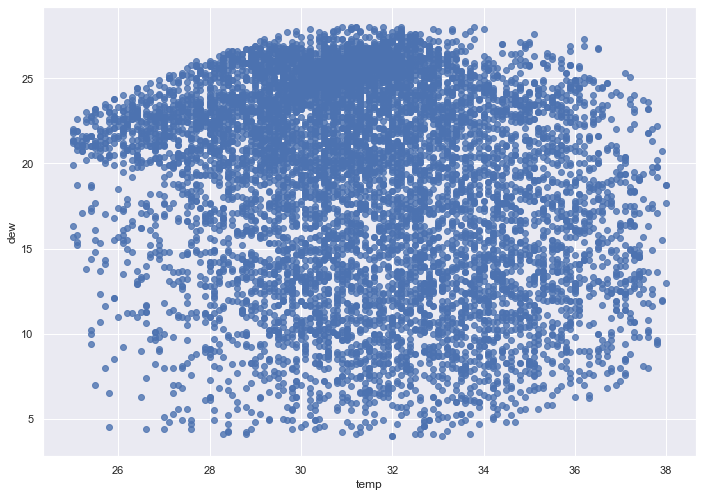

In [47]:
#-------------------CHECKING THE GRAPHS OF PARAMETERS V/S TEMPERATURE-----------------

#Temp vs DEW
sns.regplot(x='temp', y='dew', scatter=True, fit_reg=False, data=weather_new)
#from graph it is clear temp increases or decreases -> slight effect on dew

<AxesSubplot:xlabel='temp', ylabel='humidity'>

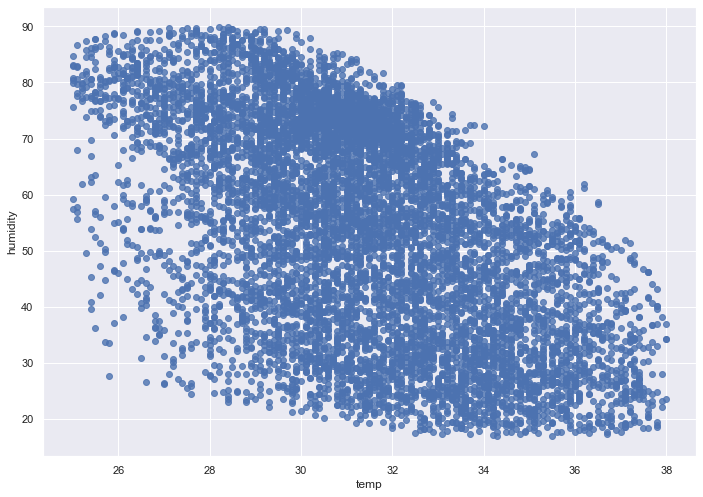

In [48]:
#TEMP VS HUMIDITY
sns.regplot(x='temp', y='humidity', scatter=True, fit_reg=False, data=weather_new)
#from graph it is clear temp increases -> humidity decreses


<AxesSubplot:xlabel='temp', ylabel='windspeed'>

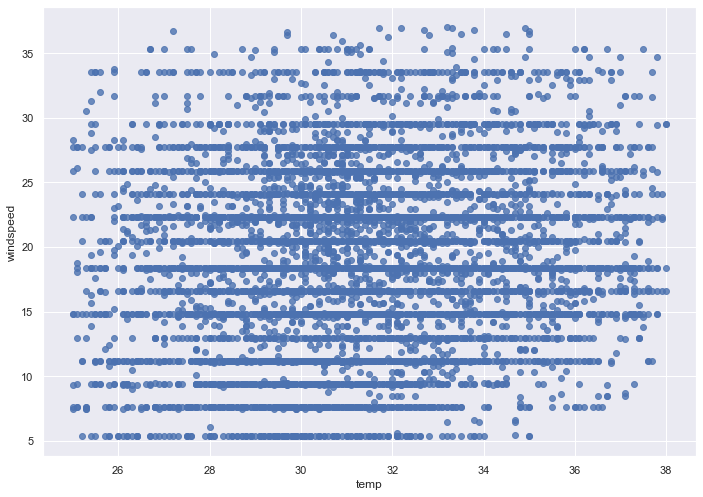

In [49]:
#TEMP VS WINDSPEED
sns.regplot(x='temp', y='windspeed', scatter=True, fit_reg=False, data=weather_new)
#from the graph we can observe there is dependency between windspeed and temp

<AxesSubplot:xlabel='temp', ylabel='sealevelpressure'>

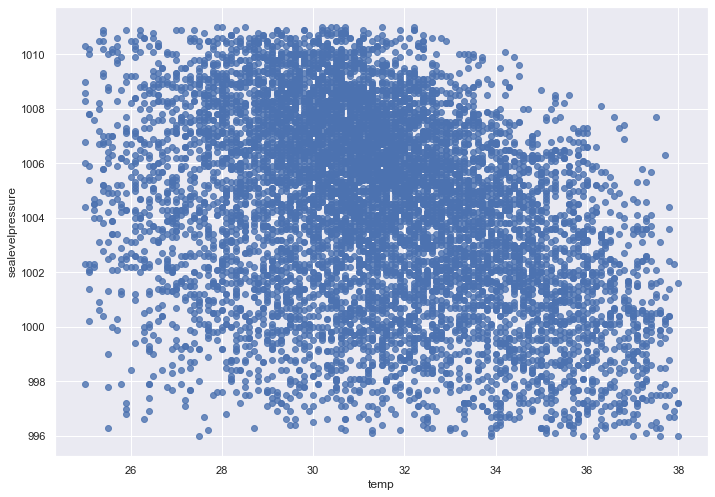

In [50]:
#TEMP VS SEALEVELPRESSURE
sns.regplot(x='temp', y='sealevelpressure', scatter=True, fit_reg=False, data=weather_new)
#from the graph it is clear if temp increases -> sea level pressure decreses

<AxesSubplot:xlabel='temp', ylabel='cloudcover'>

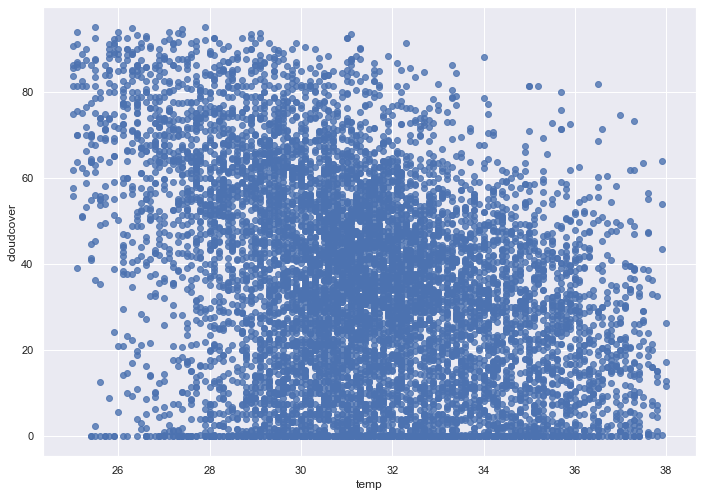

In [51]:
#TEMP VS CLOUDCOVER
sns.regplot(x='temp', y='cloudcover', scatter=True, fit_reg=False, data=weather_new)
#from the graph it is clear if temp increases -> cloud cover decreses


<AxesSubplot:xlabel='temp', ylabel='visibility'>

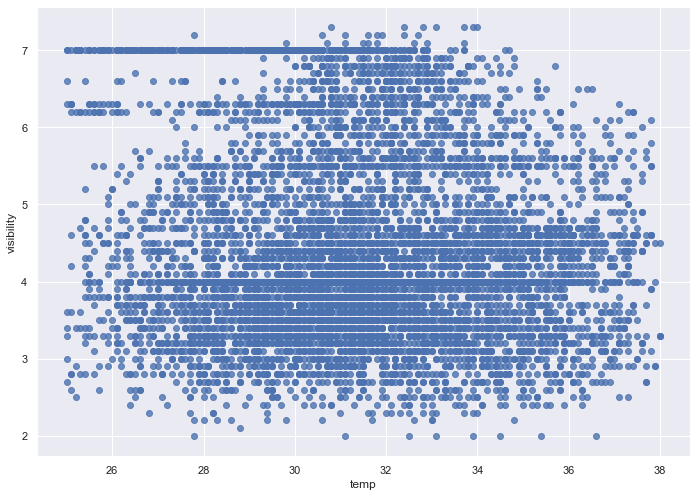

In [52]:
#TEMP VS VISIBILITY
sns.regplot(x='temp', y='visibility', scatter=True, fit_reg=False, data=weather_new)
#from the graph we can observe there is dependency between visibility and temp

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

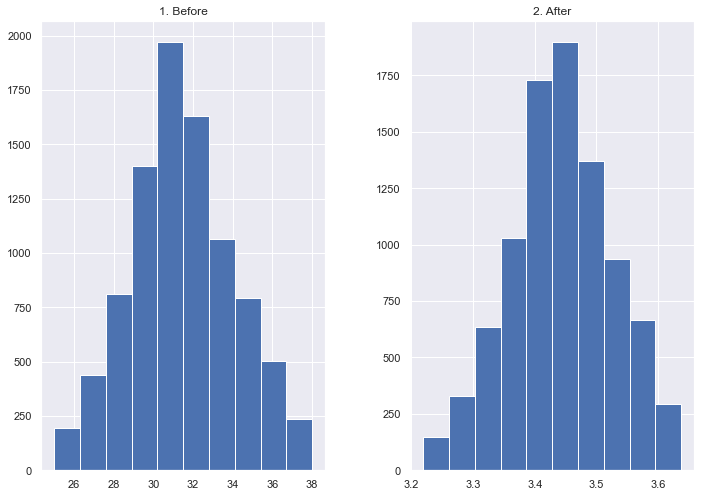

In [53]:
#-------------MODEL BUILDING--------------------------
# Separating input and output features
x1 = weather_new.drop(['temp'], axis='columns')
y1 = weather_new['temp']

# Plotting the variable temp
temp = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
temp.hist()
#SO HERE WE DO NOT SEE MUCH VARIATION AFTER APPLYING THE LOGARITHM 

In [54]:
#---------------Splitting dataset into test and train----------------------------
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6323, 6) (2711, 6) (6323,) (2711,)


THE MEAN SQUARE ERROR IS             :  0.9342482648519757
THE ROOT MEAN SQUARE ERROR IS        :  0.9665651891372747
THE R-SQUARED VALUE OF THE TRAINING SET IS  :  0.8633921051446946
THE R-SQUARED VALUE OF THE TEST SET IS      :  0.8601917367833845


<AxesSubplot:ylabel='temp'>

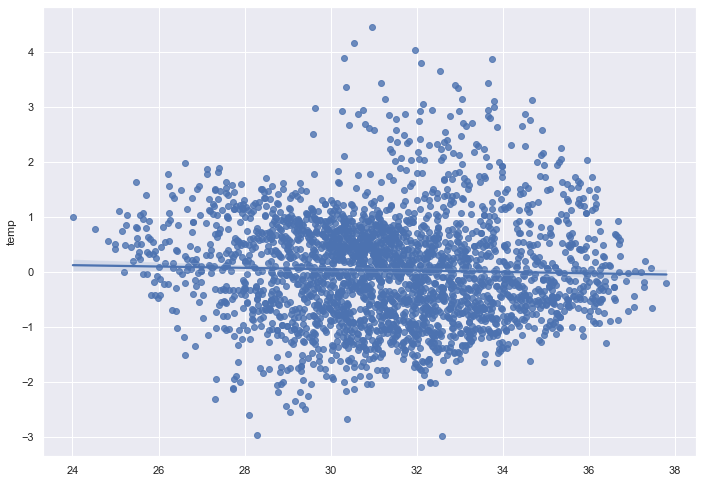

In [55]:
#-------------------LINEAR REGRESSION------------------------
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)


# Model
model_lin1=lgr.fit(X_train,y_train)

# Predicting model on test set
weather_predictions_lin1 = lgr.predict(X_test)

# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, weather_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print("THE MEAN SQUARE ERROR IS             : ",lin_mse1)
print("THE ROOT MEAN SQUARE ERROR IS        : ",lin_rmse1)

# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print("THE R-SQUARED VALUE OF THE TRAINING SET IS  : ",r2_lin_train1)
print("THE R-SQUARED VALUE OF THE TEST SET IS      : ",r2_lin_test1)

# Regression diagnostics- Residual plot analysis
residuals1=y_test - weather_predictions_lin1
sns.regplot(x=weather_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=True)

In [56]:
#-------------------------------------------PREDICTING TEMPARATURE ON UNSEEN DATA BY USING OUR MODEL------------------------
#INPUTING -> DEW,HUMIDITY,WINDSPEED,SEA LEVEL PRESSURE,CLOUD COVER,VISIBILITY
#OUTPUTING -> TEMPARATURE
inp = np.array([[4.8],[28],[18.3],[1009.5],[2.6],[3.2]])
inp=inp.reshape(1,-1)
temp = model_lin1.predict(inp)
print("THE PREDICTED TEMPERATURE IS : ",temp)
print("THE ACTUAL TEMPERATURE IS    :  27.1\n\n")

THE PREDICTED TEMPERATURE IS :  [27.61503055]
THE ACTUAL TEMPERATURE IS    :  27.1




D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
